<a href="https://colab.research.google.com/github/dinda-jpg/Praktikum-Machine-Learning-Modern-Prediction/blob/main/Regression_Tree_dan_K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum II & III Machine Learning dan Modern Prediction**


=================================================

Nama  : Dinda Aprilia

NPM : F1F022007

REGRESSION TREE DAN K-NEAREST NEIGHBORS
=================================================

# Latar Belakang

Metode machine learning seperti Regression Tree dan K-Nearest Neighbors (KNN) telah menjadi teknik prediksi yang banyak dimanfaatkan dalam berbagai bidang, termasuk analisis penjualan otomotif. Regression Tree bekerja dengan membagi ruang prediktor ke dalam beberapa region homogen melalui proses pemilihan split yang optimal sehingga mampu menangkap hubungan non-linear antara variabel prediktor dan variabel respons. Keunggulan model ini terletak pada interpretasinya yang mudah, fleksibilitasnya, serta kemampuannya menangani data berskala besar dan kompleks (Loh, 2011; Safavian & Landgrebe, 1991).

K-Nearest Neighbors (KNN) adalah metode instance-based learning yang melakukan prediksi berdasarkan kedekatan data baru dengan sejumlah tetangga terdekat dalam ruang fitur. Teknik ini memiliki keunggulan karena sederhana, tidak memerlukan asumsi distribusi data, dan dapat bekerja baik pada pola yang kompleks. KNN telah digunakan secara luas dalam tugas klasifikasi dan regresi, termasuk pengenalan pola, deteksi medis, hingga sistem rekomendasi (Cover dan Hart, 1967; Altman, 1992)

Dalam konteks data penjualan BMW, kedua metode ini sangat relevan digunakan karena perilaku penjualan kendaraan dipengaruhi oleh beragam faktor seperti harga, fitur kendaraan, kondisi ekonomi, preferensi konsumen, dan tren pasar. Regression Tree dapat mengidentifikasi faktor-faktor kunci yang paling berpengaruh terhadap penjualan melalui struktur pohon yang interpretatif, sedangkan KNN dapat memprediksi penjualan berdasarkan pola kesamaan dengan periode atau model kendaraan sebelumnya. Penggunaan algoritma ini memungkinkan analisis yang lebih akurat dalam memahami dinamika penjualan, memetakan pola permintaan, serta mendukung pengambilan keputusan strategis perusahaan otomotif seperti BMW.

# Rumusan Masalah

Adapun rumusan masalah penelitian kali ini yaitu:
1. Apa konsep dasar algoritma Decision Tree?
2. Bagaimana cara membedakan antara Classification Tree dan Regression Tree?
3. Bagaimana cara menerapkan Decision Tree untuk klasifikasi?
4. Bagaimana cara melakukan evaluasi model Decision Tree menggunakan confusion matrix dan accuracy score?
5. Menginterpretasikan hasil model dalam bentuk visualisasi pohon keputusan.
6. Melatih kemampuan analisis melalui latihan mandiri menggunakan dataset lain.
7. Memahami konsep dasar algoritma K-Nearest Neighbors (KNN) untuk
klasifikasi.
8. Mengimplementasikan KNN menggunakan pustaka Scikit-learn di Python.
9. Mengevaluasi performa model KNN menggunakan accuracy score dan
confusion matrix

# Tujuan Penelitian

Adapun tujuan penelitian kali ini yaitu:
Adapun rumusan masalah penelitian kali ini yaitu:
1. Menjelaskan konsep dasar algoritma Decision Tree.
2. Membedakan antara Classification Tree dan Regression Tree.
3. Menerapkan Decision Tree untuk klasifikasi.
4. Melakukan evaluasi model Decision Tree menggunakan confusion matrix dan
accuracy score.
5. Menginterpretasikan hasil model dalam bentuk visualisasi pohon keputusan.
6. Melatih kemampuan analisis melalui latihan mandiri menggunakan dataset lain.
7. Memahami konsep dasar algoritma K-Nearest Neighbors (KNN) untuk
klasifikasi.
8. Mengimplementasikan KNN menggunakan pustaka Scikit-learn di Python.
9. Mengevaluasi performa model KNN menggunakan accuracy score dan
confusion matrix

# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [ ]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 133.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 25.5 MB/s eta 0:00:00


In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,  OrdinalEncoder, LabelEncoder,  StandardScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Memuat Data

Berikut merupakan beberapa dataset yang akan digunakan untuk memperjelas tujuan dari notebook ini. Data yang digunakan pada penelitian merupakan data skunder yang diberikan oleh Asisten Praktikum pada link berikut  https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/BMW%20sales%20data%20(2010-2024).csv .

In [ ]:

bmw_df = pd.read_csv(' https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/BMW%20sales%20data%20(2010-2024).csv', sep=';')
bmw_df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080
...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486


# Melihat Tipe Data

In [ ]:
bmw_df.dtypes

,0
Model,object
Year,int64
Region,object
Color,object
Fuel_Type,object
Transmission,object
Engine_Size_L,float64
Mileage_KM,int64
Price_USD,int64
Sales_Volume,int64


# Cek _Missing Value_

In [ ]:
# Check Missing Values
bmw_df.isnull().sum()

,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


# Statistik Deskriptif Data

In [ ]:
print(bmw_df.describe())

               Year  Engine_Size_L     Mileage_KM      Price_USD  Sales_Volume
count  50000.000000   50000.000000   50000.000000   50000.000000  50000.000000
mean    2017.015700       3.247180  100307.203140   75034.600900   5067.514680
std        4.324459       1.009078   57941.509344   25998.248882   2856.767125
min     2010.000000       1.500000       3.000000   30000.000000    100.000000
25%     2013.000000       2.400000   50178.000000   52434.750000   2588.000000
50%     2017.000000       3.200000  100388.500000   75011.500000   5087.000000
75%     2021.000000       4.100000  150630.250000   97628.250000   7537.250000
max     2024.000000       5.000000  199996.000000  119998.000000   9999.000000


# _Feature Engineering_

## A- Splitting Data

In [ ]:
# Splitting between `X` and `y`
X = bmw_df.drop('Sales_Volume', axis = 1)
y = bmw_df['Sales_Volume']

In [ ]:
# Splitting Dataset
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=200)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)


Train size :  (37500, 9)
Test size  :  (12500, 9)


Output menunjukkan bahwa setelah pemisahan data menggunakan train_test_split dengan proporsi 75% data latih dan 25% data uji, diperoleh 37.500 observasi dengan 9 variabel prediktor pada set training, dan 12.500 observasi dengan 9 variabel prediktor pada set testing. Ini berarti dataset awal berjumlah 50.000 observasi

### B- Scaling

In [ ]:
# Identify numerical features directly from X_train
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()

# Initialize lists to store feature names based on skewness
nilai_skew = []
nilai_skew_normal = []

# Calculate skewness for each numerical feature in X_train
print("Calculating skewness for numerical features in X_train:")
for feature in numerical_features:
    skewness = X_train[feature].skew()
    print(f"  {feature}: {skewness:.4f}")
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(feature)
    else:
        nilai_skew.append(feature)

# Display the categorized features
print('\nKolom yang mempunyai nilai skewness sedang (skewed):', nilai_skew)
print('Kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

Calculating skewness for numerical features in X_train:
  Year: -0.0108
  Engine_Size_L: -0.0075
  Mileage_KM: -0.0079
  Price_USD: 0.0075

Kolom yang mempunyai nilai skewness sedang (skewed): []
Kolom yang mempunyai nilai skewness normal: ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']


In [ ]:

numerical_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']
scaler = StandardScaler()

# Apply fit_transform to X_train for numerical columns
X_train_scaled = X_train.copy() # Create a copy to avoid modifying original X_train directly if not intended
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Apply transform to X_test for numerical columns
X_test_scaled = X_test.copy() # Create a copy to avoid modifying original X_test directly if not intended
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Numerical features in X_train and X_test have been scaled using StandardScaler.")
print("X_train_scaled head:\n", X_train_scaled[numerical_cols].head())
print("X_test_scaled head:\n", X_test_scaled[numerical_cols].head())

Numerical features in X_train and X_test have been scaled using StandardScaler.
X_train_scaled head:
            Year  Engine_Size_L  Mileage_KM  Price_USD
28475 -0.473404       0.545830    1.243500  -1.039395
10801 -1.166587       0.545830    1.507087  -0.504411
10124 -1.397648      -0.246990   -1.310046   0.076110
4822  -1.166587      -0.346092    1.436374   1.015719
21632 -0.473404      -0.841605    0.712481   0.823966
X_test_scaled head:
            Year  Engine_Size_L  Mileage_KM  Price_USD
20518  0.681901       0.744035   -1.218395  -1.583478
20570 -0.704465       1.437753   -1.325379   0.458581
38530  1.375084      -0.048785   -1.577341   0.601264
39945 -0.242343       0.644933    0.781107  -0.668212
1713  -0.242343      -0.643400   -1.340367  -1.698745


Penerapan StandardScaler pada dataset membuat setiap fitur berada dalam skala yang seragam, yaitu dengan nilai yang ditransformasikan agar memiliki rata-rata mendekati 0 serta standar deviasi mendekati 1.

# Analisis Data Eksploratif

### Distribusi Variabel Y

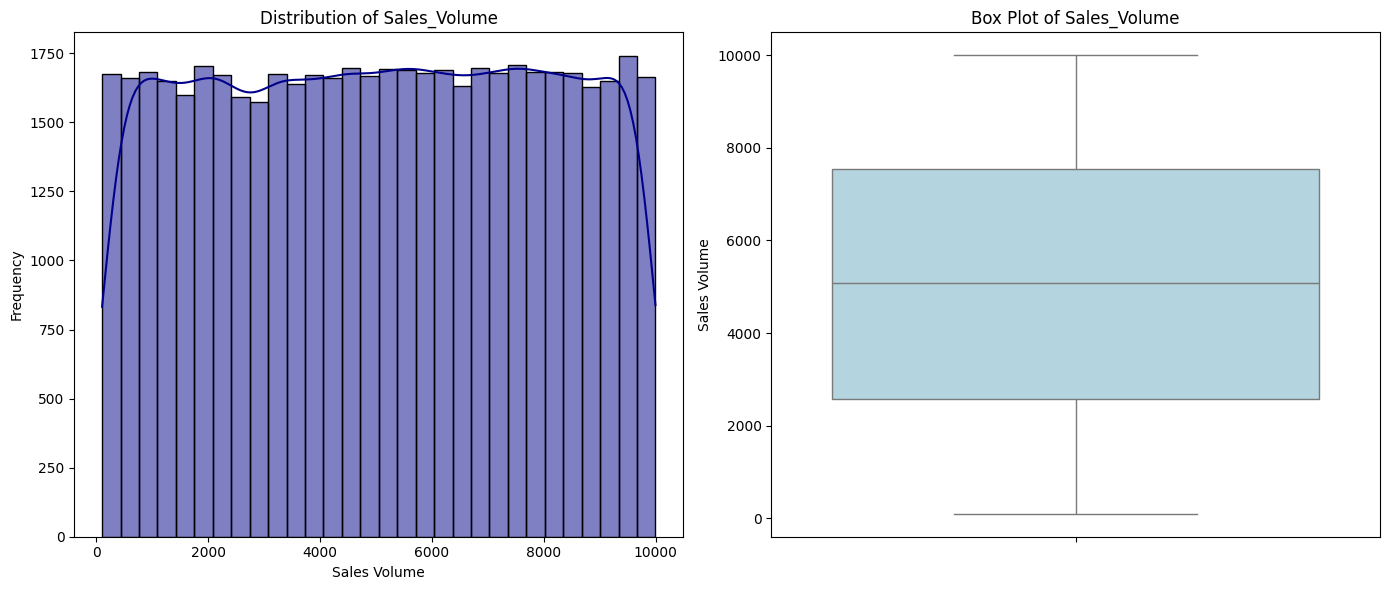

In [ ]:
# Set up the figure and axes for subplots
plt.figure(figsize=(14, 6))

# Histogram for Sales_Volume
plt.subplot(1, 2, 1)
sns.histplot(bmw_df['Sales_Volume'], kde=True, bins=30, color='darkblue')
plt.title('Distribution of Sales_Volume')
plt.xlabel('Sales Volume')
plt.ylabel('Frequency')

# Box plot for Sales_Volume
plt.subplot(1, 2, 2)
sns.boxplot(y=bmw_df['Sales_Volume'], color='lightblue')
plt.title('Box Plot of Sales_Volume')
plt.ylabel('Sales Volume')

plt.tight_layout()
plt.show()

Berdasarkan histogram dan box plot, variabel Sales_Volume tampak memiliki sebaran yang relatif merata di seluruh rentang nilainya. Nilai penjualan tersebar cukup stabil dari batas minimum hingga maksimum tanpa adanya penumpukan pada rentang tertentu. Hal ini menunjukkan bahwa distribusi penjualan tidak didominasi oleh nilai ekstrem dan hanya terdapat sedikit titik yang dapat dianggap sebagai outlier, sehingga pola datanya cenderung stabil.

### Perbandingan Distribusi Variabel Y dan X

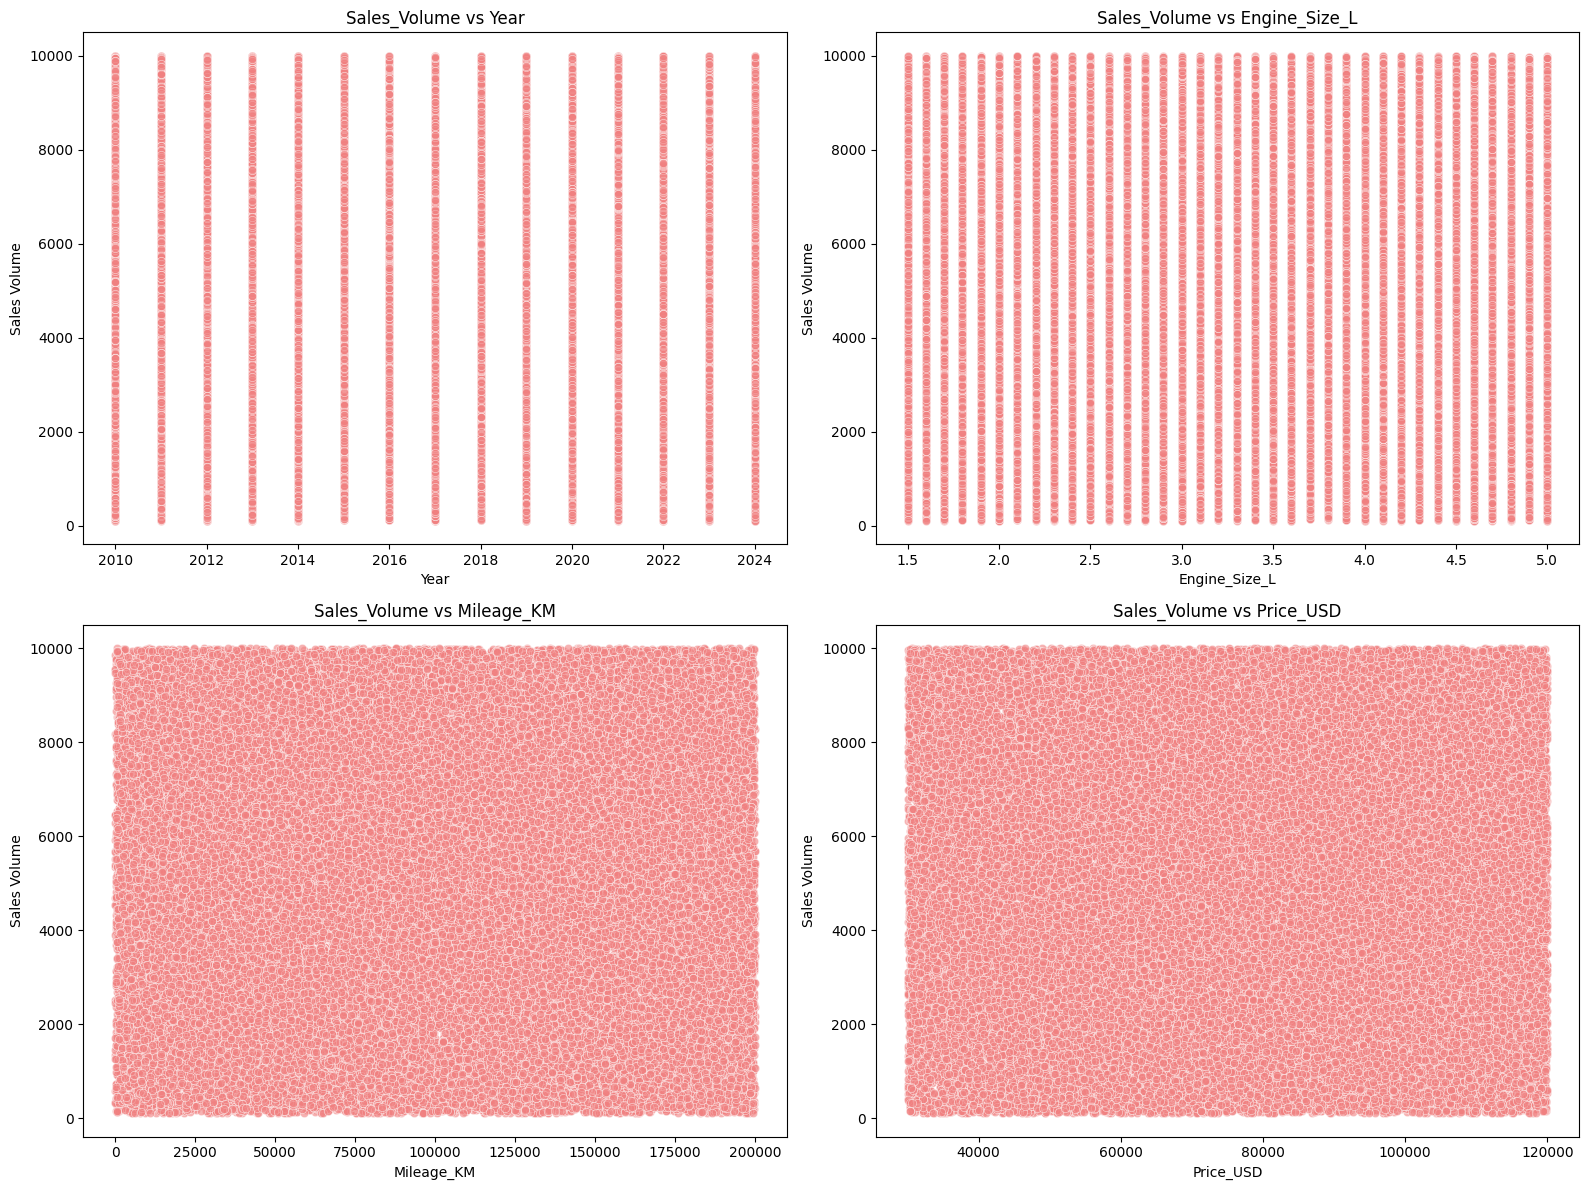

In [ ]:
numerical_features = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=bmw_df[feature], y=bmw_df['Sales_Volume'], color='lightcoral', alpha=0.6)
    plt.title(f'Sales_Volume vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sales Volume')
plt.tight_layout()
plt.show()

Scatter plot antara Sales_Volume dan variabel numerik seperti Year, Engine_Size_L, Mileage_KM, serta Price_USD memperlihatkan tidak adanya pola hubungan linear yang jelas. Titik-titik data tersebar acak tanpa arah tertentu, mengindikasikan bahwa perubahan pada variabel-variabel tersebut tidak berkaitan secara langsung dengan perubahan pada Sales_Volume. Hal ini sejalan dengan hasil matriks korelasi yang menunjukkan bahwa nilai korelasi Pearson antara Sales_Volume dan fitur numerik lain sangat kecil mendekati nol, sehingga dapat disimpulkan bahwa hubungan linier di antara variabel-variabel tersebut bersifat sangat lemah atau hampir tidak ada.

### Korelasi Variabel Y dan X

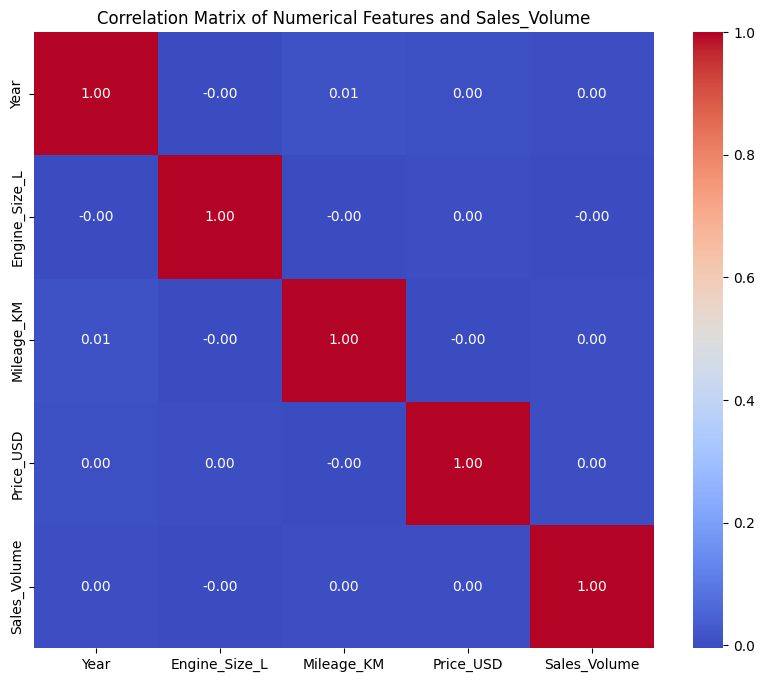

In [ ]:
numerical_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']
correlation_matrix = bmw_df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features and Sales_Volume')
plt.show()

Heatmap korelasi memperlihatkan bahwa tidak ada korelasi yang signifikan antara variabel prediktor (Year, Engine_Size_L, Mileage_KM, Price_USD) dengan variabel respons Sales_Volume. Nilai korelasi yang mendekati nol menunjukkan bahwa fitur-fitur numerik tersebut tidak memberikan kontribusi linear yang berarti dalam menjelaskan variasi penjualan. Kondisi ini berdampak pada performa model regresi seperti Decision Tree maupun K-Nearest Neighbors (KNN).

Dalam Regression Tree, model membagi data ke dalam beberapa bagian berdasarkan fitur yang dianggap paling relevan untuk memprediksi nilai target. Sementara itu, pada metode K-Nearest Neighbors (KNN) untuk regresi, prediksi dilakukan dengan menghitung rata-rata nilai target dari sejumlah tetangga terdekat (k) yang berada dalam ruang fitur.

Dampaknya terhadap kinerja model adalah bahwa kedua metode tersebut—baik Decision Tree maupun KNN—mengalami kesulitan dalam mengenali pola yang sebenarnya ada pada data. Hal ini tercermin dari nilai error (MAE, MSE, RMSE) yang cenderung tinggi. Dengan kata lain, fitur-fitur yang digunakan tidak memberikan informasi yang cukup kuat untuk membantu model memprediksi Sales_Volume secara akurat.

# _Training Model_

In [ ]:
# Initialize and train the DecisionTreeRegressor model
reg_tree_model = DecisionTreeRegressor(random_state=42)
reg_tree_model.fit(X_train_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']], y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Initialize and train the KNeighborsRegressor model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']], y_train)

KNeighborsRegressor()

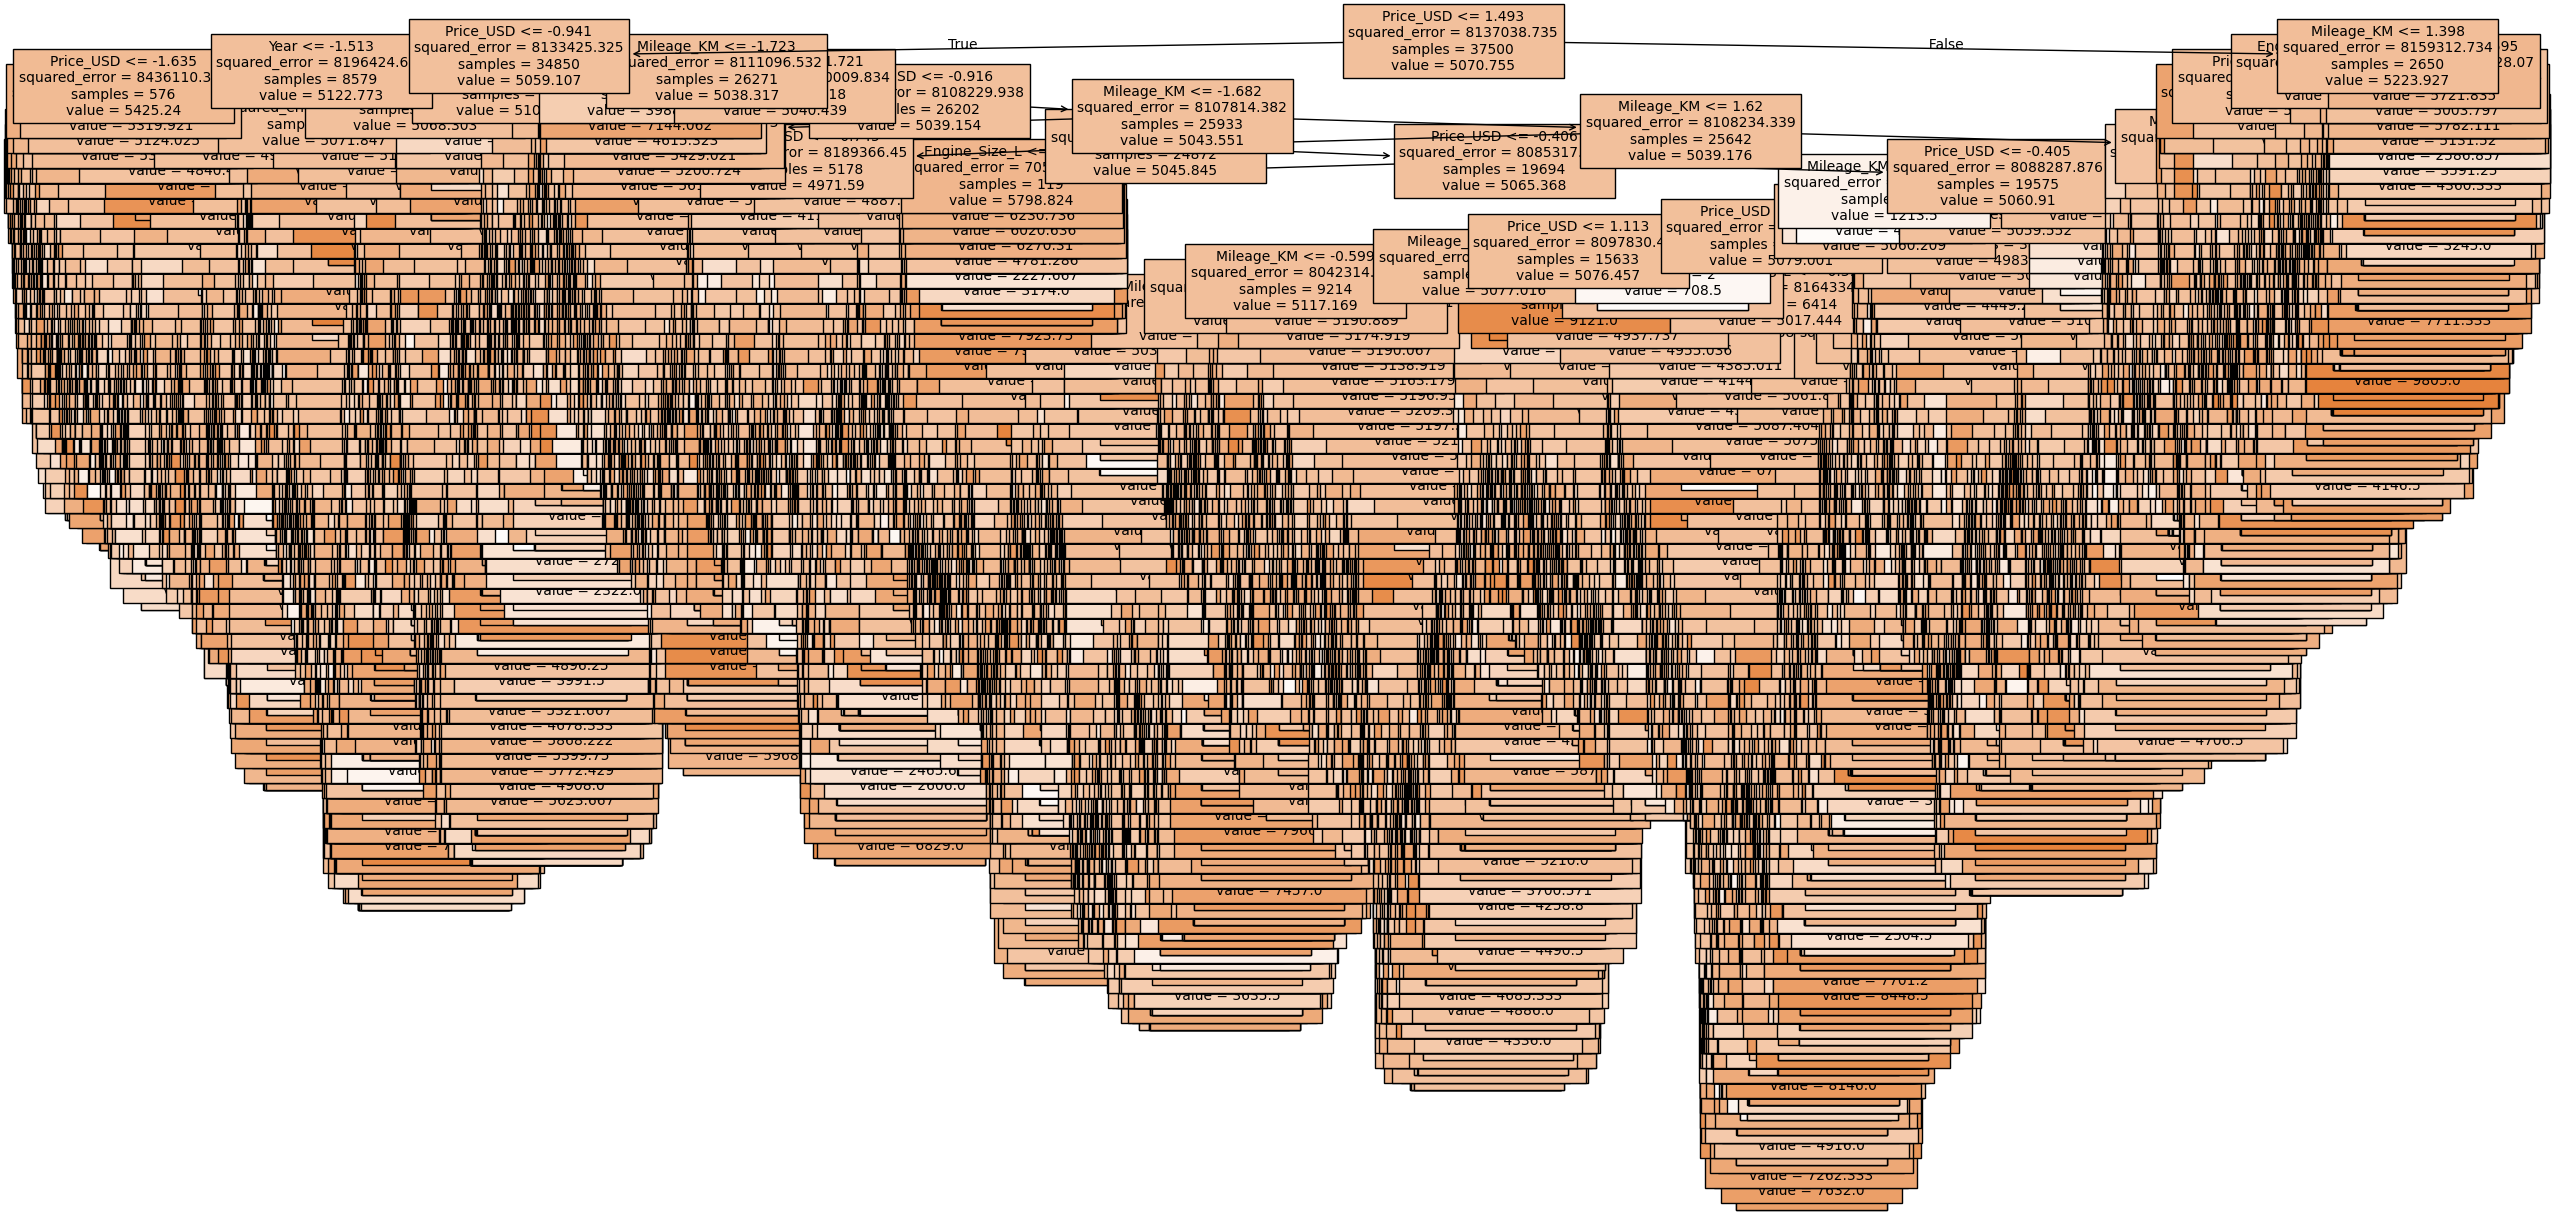

In [ ]:
plt.figure(figsize=(30,15))

# Define the feature names explicitly for plotting
feature_names_for_plot = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']

tree.plot_tree(reg_tree_model, feature_names=feature_names_for_plot, filled=True, fontsize= 10)
plt.show()

# _Model Performance_

In [ ]:
# Make predictions on the test set
y_pred_reg_tree = reg_tree_model.predict(X_test_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']])

# Calculate evaluation metrics
mae_reg_tree = mean_absolute_error(y_test, y_pred_reg_tree)
mse_reg_tree = mean_squared_error(y_test, y_pred_reg_tree)
rmse_reg_tree = np.sqrt(mse_reg_tree)

print("Regression Tree Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_reg_tree:.2f}")
print(f"Mean Squared Error (MSE): {mse_reg_tree:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_reg_tree:.2f}")

Regression Tree Model Performance:
Mean Absolute Error (MAE): 3356.38
Mean Squared Error (MSE): 16865885.89
Root Mean Squared Error (RMSE): 4106.81


In [ ]:
# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']])

# Calculate evaluation metrics
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print("K-Nearest Neighbors Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.2f}")

K-Nearest Neighbors Regression Model Performance:
Mean Absolute Error (MAE): 2639.25
Mean Squared Error (MSE): 9853448.80
Root Mean Squared Error (RMSE): 3139.02


### Perbandingan Model Performance

Berikut adalah perbandingan metrik kinerja untuk model Regression Tree dan K-Nearest Neighbors (KNN):

| Metrik                 | Regression Tree      | K-Nearest Neighbors    |
| :--------------------- | :------------------- | :--------------------- |
| Mean Absolute Error (MAE)  | 3356.38              | 2639.25                |
| Mean Squared Error (MSE)   | 16865885.89          | 9853448.80             |
| Root Mean Squared Error (RMSE)| 4106.81              | 3139.02                |
|  |  |  |



Berdasarkan hasil evaluasi kinerja model, metode K-Nearest Neighbors (KNN) terbukti memberikan performa yang lebih baik dibandingkan Regression Tree dalam memprediksi Sales_Volume. Hal ini ditunjukkan oleh nilai Mean Absolute Error (MAE), Mean Squared Error (MSE), dan Root Mean Squared Error (RMSE) pada model KNN yang lebih rendah, menandakan prediksi yang lebih akurat.

# Kesimpulan

Praktikum ini bertujuan untuk membandingkan kemampuan model Regression Tree dan K-Nearest Neighbors (KNN) dalam memprediksi Sales_Volume mobil BMW. Dataset yang digunakan berisi data penjualan BMW dari tahun 2010 hingga 2024.

Pada proses eksplorasi data, diketahui bahwa tidak terdapat korelasi linear yang kuat antara Sales_Volume dan fitur numerik seperti Year, Engine_Size_L, Mileage_KM, serta Price_USD. Distribusi Sales_Volume juga tampak cukup merata. Setelah itu, data dibagi menjadi set pelatihan (75%) dan pengujian (25%), kemudian dilakukan scaling menggunakan StandardScaler karena distribusi data cenderung normal.

Dua model DecisionTreeRegressor dan KNeighborsRegressor dilatih dengan menggunakan fitur numerik tersebut dan dievaluasi menggunakan metrik MAE, MSE, dan RMSE.

Berdasarkan hasil evaluasi, model K-Nearest Neighbors (KNN) memberikan performa yang lebih baik dibandingkan Regression Tree. Hal ini ditunjukkan oleh nilai MAE, MSE, dan RMSE yang lebih rendah pada model KNN. Walaupun korelasi awal menunjukkan lemahnya hubungan linear antar variabel, KNN mampu menangkap pola secara lebih efektif, kemungkinan karena sifatnya yang dapat memodelkan hubungan non-linear dan berbasis kedekatan lokal. Dengan demikian, KNN menjadi model yang lebih sesuai untuk memprediksi Sales_Volume pada dataset ini.

# Referensi

Altman, N. S. (1992). An introduction to kernel and nearest-neighbor nonparametric regression. The American Statistician, 46(3), 175–185.

Cover, T., & Hart, P. (1967). Nearest neighbor pattern classification. IEEE Transactions on Information Theory, 13(1), 21–27.

Loh, W.-Y. (2011). Classification and regression trees. Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery, 1(1), 14–23.

Safavian, S. R., & Landgrebe, D. (1991). A survey of decision tree classifier methodology. IEEE Transactions on Systems, Man, and Cybernetics, 21(3), 660–674.